In [3]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [4]:
%matplotlib inline

In [5]:
m = n = l = 4 # L of square grid

# With random field

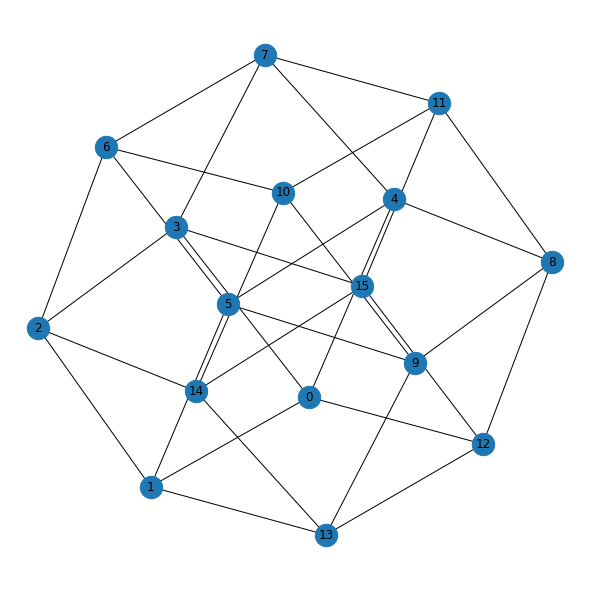

In [7]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

H_coeff = 6
H = H_coeff * (1. - 2 * np.random.random(N))
#H=np.zeros(N)

betas_fast = np.arange(1e-6,1.5,2e-1)
j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [8]:
import imp
imp.reload(solvers)
tree = model.model(N, H, J, J_interaction)
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -1.62e-05 M: 3.42e-06 S: 0.693
beta: 0.2, Fe: -4.802 Energy: -2.32 M: 0.53 S: 0.497-76.52
beta: 0.4, Fe: -3.767 Energy: -2.99 M: 0.741 S: 0.30960.10
beta: 0.6, Fe: -3.549 Energy: -3.2 M: 0.842 S: 0.209-56.7
beta: 0.8, Fe: -3.475 Energy: -3.3 M: 0.904 S: 0.143-55.66
beta: 1.0, Fe: -3.445 Energy: -3.35 M: 0.942 S: 0.0963.110
beta: 1.2, Fe: -3.431 Energy: -3.38 M: 0.966 S: 0.06414.99
beta: 1.4, Fe: -3.425 Energy: -3.39 M: 0.979 S: 0.04244.88


In [9]:
res_nn = solvers.nn_sol(tree, betas_fast, max_step=2000, bias = True, 
                        z2 = False, x_hat_clip = False, batch_size=10000,)
res_nn["name"]="nn"

fe: -693147.219 std_fe: 2.64E+00 M: 0.009 S: 0.693 E: 0.021M: 0.00505, B1 = -0.00000
fe: -4.801 std_fe: 2.83E-02 M: 0.533 S: 0.496 E: -2.320: 0.531, B1 = -0.593
fe: -3.765 std_fe: 2.12E-02 M: 0.743 S: 0.309 E: -2.994: 0.742, B1 = -0.789
fe: -3.548 std_fe: 1.23E-02 M: 0.846 S: 0.207 E: -3.202: 0.845, B1 = -1.104
fe: -3.474 std_fe: 6.37E-03 M: 0.905 S: 0.142 E: -3.297: 0.905, B1 = -1.497
fe: -3.445 std_fe: 3.14E-03 M: 0.942 S: 0.097 E: -3.348: 0.943, B1 = -1.921
fe: -3.431 std_fe: 1.73E-03 M: 0.967 S: 0.063 E: -3.379: 0.966, B1 = -2.350
fe: -3.425 std_fe: 1.36E-04 M: 0.980 S: 0.043 E: -3.395 0.98, B1 = -2.7722


In [17]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(tree, betas_fast)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -4.800, ener: -2.316, M: 0.532, iter 10
fe: -3.765, ener: -2.995, M: 0.745, iter 10
fe: -3.548, ener: -3.201, M: 0.843, iter 9
fe: -3.475, ener: -3.296, M: 0.904, iter 8
fe: -3.445, ener: -3.349, M: 0.942, iter 6
fe: -3.431, ener: -3.378, M: 0.966, iter 6
fe: -3.425, ener: -3.395, M: 0.980, iter 5


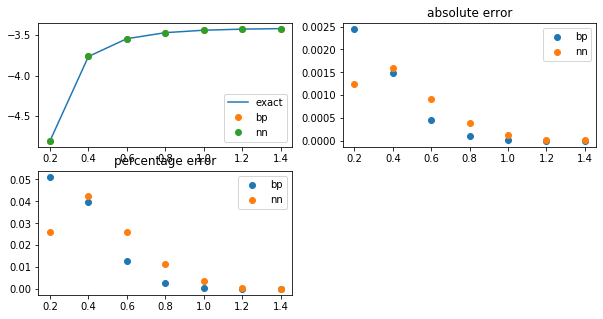

In [11]:
%matplotlib inline
label="fe"
import imp
imp.reload(solvers)
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn], init_=1)
#plt.ylim(-0.001,0.11)
plt.show()

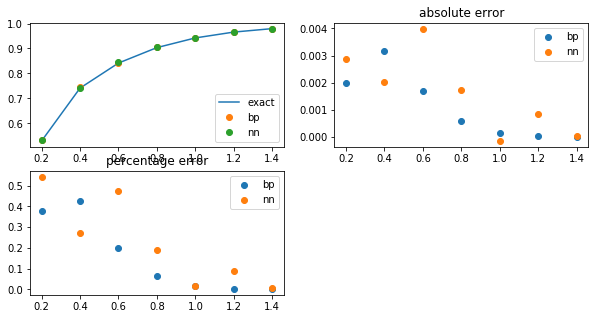

In [18]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn], init_=1)
plt.show()

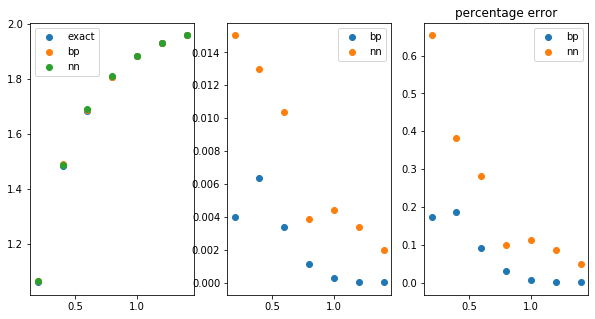

In [19]:
%matplotlib inline
label="M_i"
import imp
imp.reload(solvers)

plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn], init_=1)
plt.show()

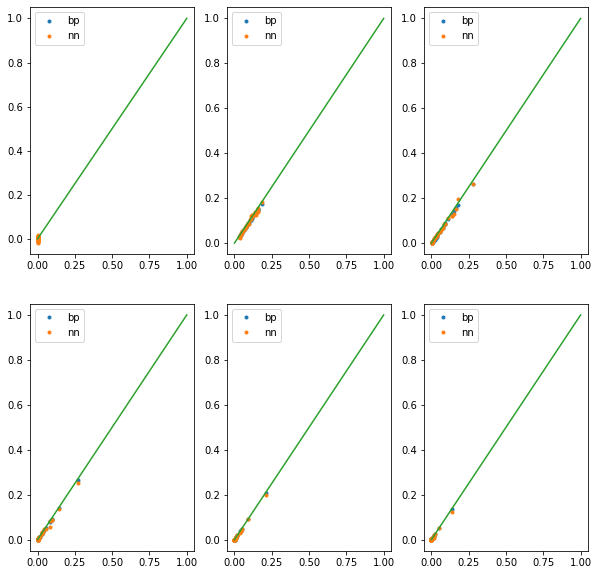

In [14]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas_fast[0:6], res_ex, [res_bp, res_nn], J_interaction)
plt.show()

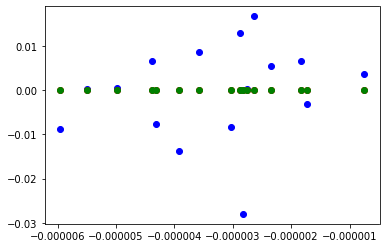

In [195]:
import matplotlib.pyplot as plt
plt.plot(res_ex["M_i"][0], res_nn["M_i"][0], "bo")
plt.plot(res_ex["M_i"][0], res_bp["M_i"][0], "ro")
plt.plot(res_ex["M_i"][0], np.tanh(1e-6*H), "go")
